In [1]:
import roerich
import roerich.algorithms
import roerich.metrics
import numpy as np

# Generate Signal

In [2]:
X, cps_true = roerich.generate_dataset(period=200, N_tot=2000)

# ChangePointDetectionClassifier

In [3]:
# detection
cpd = roerich.algorithms.ChangePointDetectionClassifier()
score, cps_pred = cpd.predict(X)
cps_pred

array([ 215,  395,  595,  800,  997, 1200, 1400, 1599, 1798])

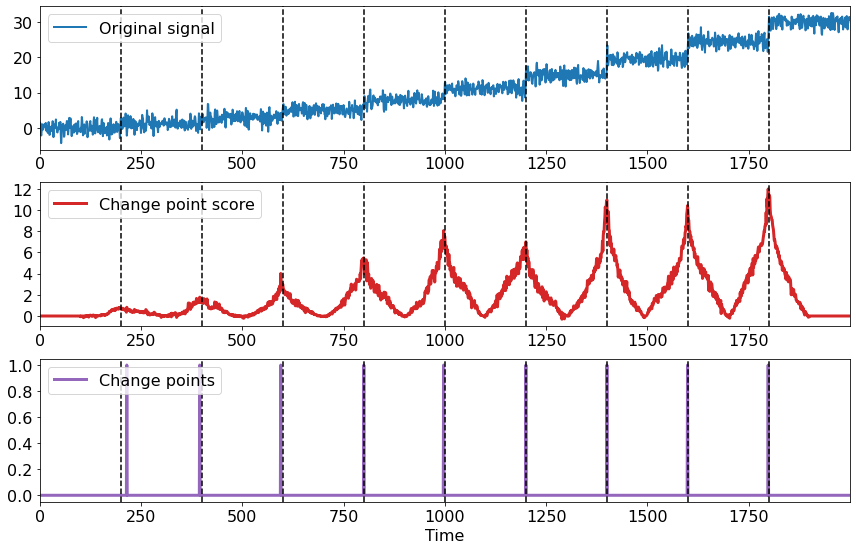

In [4]:
# visualization
roerich.display(X, cps_true, score, cps_pred)

In [5]:
# metrics
precision, recall = roerich.metrics.precision_recall_scores(cps_true, cps_pred, window=20)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  1.0
Recall:  1.0


In [6]:
# one more example
clf = roerich.algorithms.NNClassifier()
cpd = roerich.algorithms.ChangePointDetectionClassifier(base_classifier=clf)

score, cps_pred = cpd.predict(X)
cps_pred

array([ 206,  412,  599,  794,  990, 1194, 1396, 1600, 1799])

# ChangePointDetectionRuLSIF

In [7]:
reg = roerich.algorithms.GBDTRuLSIFRegressor(n_estimators=5)
cpd = roerich.algorithms.ChangePointDetectionRuLSIF(reg)

score, cps_pred = cpd.predict(X)
cps_pred

array([ 192,  404,  597,  794,  998, 1196, 1399, 1597, 1798])

In [8]:
reg = roerich.algorithms.NNRuLSIFRegressor()
cpd = roerich.algorithms.ChangePointDetectionRuLSIF(reg)

score, cps_pred = cpd.predict(X)
cps_pred

array([ 198,  371,  581,  792,  990, 1214, 1402, 1592, 1793])

# OnlineNNClassifier

In [9]:
cpd = roerich.algorithms.OnlineNNClassifier(net='default', scaler="default", metric="KL_sym",
                                            periods=1, window_size=1, lag_size=100, step=1, 
                                            n_epochs=10, lr=0.1, lam=0.0001, optimizer="Adam")

score, cps_pred = cpd.predict(X)
cps_pred

array([ 207,  397,  606,  807, 1002, 1202, 1402, 1602, 1803])

# OnlineNNRuLSIF

In [10]:
cpd = roerich.algorithms.OnlineNNRuLSIF(alpha=0.05, net='default', scaler="default",
                                        periods=1, window_size=1, lag_size=100, step=1, n_epochs=10,
                                        lr=0.1, lam=0.0001, optimizer="Adam")

score, cps_pred = cpd.predict(X)
cps_pred

array([ 202,  395,  602,  805, 1004, 1203, 1401, 1604, 1805])